# Welcome to Jupyter

Jupyter is an integrated, literate, and web-based programming environment. In Jupyter, you can author executable *Notebooks* that combine code, output, and documentation. It is dynamic and interpretive, and encourages exploration and experimentation.

A Juputer notebook is divided into *cells*. Each cell can be executed and edited independently. You can also save the contents of cells to produce stand-alone programs if you wish. Jupyter supports many programming languages, such as Python, R, and Julia. In Comp555 we will use primarily Python 2.7.

In [26]:
# In Python, the remainder of lines after a "pound sign" (a.k.a hashtag) is a comment.

N = 16
x = range(-N,N+1,2)    # range(N) -> [0, 1,..., N-1]; range(N,M) -> [N, N+1, ..., M-2, M-1]
                     # range(N,M,S) -> [N, N+S, N+2S, ..., N+kS < M]

print x, len(x)

[-16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16] 17


In [27]:
y = [v*v for v in x]
z = [100-3*v for v in x]
print y
print z

[256, 196, 144, 100, 64, 36, 16, 4, 0, 4, 16, 36, 64, 100, 144, 196, 256]
[148, 142, 136, 130, 124, 118, 112, 106, 100, 94, 88, 82, 76, 70, 64, 58, 52]


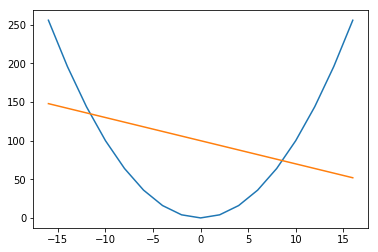

In [28]:
%matplotlib inline
import matplotlib.pyplot as plot

result = plot.plot(x,y)
result = plot.plot(x,z)

# Next well consider some string manipulations

In [33]:
import random

bases = ["ACGT"[random.randint(0,3)] for i in xrange(100)] # xrange() returns an iterator, whereas range() returns a list
dna = ''.join(bases)

print dna

AAAGCGTCCGGACACCTATATCGAAGAATGTGGGCTAAATGGCGATTGATCAAGGGCCCACTACTAAGCTTCGGAAGGAATGATCCAATGCTATCCTCGC


In [34]:
for i in xrange(10,len(dna),10):
    print dna[:i], dna[i:]

AAAGCGTCCG GACACCTATATCGAAGAATGTGGGCTAAATGGCGATTGATCAAGGGCCCACTACTAAGCTTCGGAAGGAATGATCCAATGCTATCCTCGC
AAAGCGTCCGGACACCTATA TCGAAGAATGTGGGCTAAATGGCGATTGATCAAGGGCCCACTACTAAGCTTCGGAAGGAATGATCCAATGCTATCCTCGC
AAAGCGTCCGGACACCTATATCGAAGAATG TGGGCTAAATGGCGATTGATCAAGGGCCCACTACTAAGCTTCGGAAGGAATGATCCAATGCTATCCTCGC
AAAGCGTCCGGACACCTATATCGAAGAATGTGGGCTAAAT GGCGATTGATCAAGGGCCCACTACTAAGCTTCGGAAGGAATGATCCAATGCTATCCTCGC
AAAGCGTCCGGACACCTATATCGAAGAATGTGGGCTAAATGGCGATTGAT CAAGGGCCCACTACTAAGCTTCGGAAGGAATGATCCAATGCTATCCTCGC
AAAGCGTCCGGACACCTATATCGAAGAATGTGGGCTAAATGGCGATTGATCAAGGGCCCA CTACTAAGCTTCGGAAGGAATGATCCAATGCTATCCTCGC
AAAGCGTCCGGACACCTATATCGAAGAATGTGGGCTAAATGGCGATTGATCAAGGGCCCACTACTAAGCT TCGGAAGGAATGATCCAATGCTATCCTCGC
AAAGCGTCCGGACACCTATATCGAAGAATGTGGGCTAAATGGCGATTGATCAAGGGCCCACTACTAAGCTTCGGAAGGAA TGATCCAATGCTATCCTCGC
AAAGCGTCCGGACACCTATATCGAAGAATGTGGGCTAAATGGCGATTGATCAAGGGCCCACTACTAAGCTTCGGAAGGAATGATCCAATG CTATCCTCGC


In [35]:
def kmers(seq, k):
    return [seq[i:i+k] for i in xrange(len(seq)-k+1)]

def reverseComp(seq):
    return ''.join([{'A':'T','C':'G','G':'C','T':'A'}[c] for c in reversed(seq)])

kmerList = kmers(dna, 8)

palindromes = [kmer for kmer in kmerList if reverseComp(kmer) == kmer]
print palindromes

repeats = [kmer for kmer in kmerList if kmerList.count(kmer) > 1]
print repeats

['GTCCGGAC', 'TTGATCAA']
[]


In [37]:
from string import maketrans

def reverseCompV2(seq):
    return ''.join(reversed(seq.translate(maketrans("ACGT", "TGCA"))))

assert reverseComp(dna) == reverseCompV2(dna)

%timeit reverseComp(dna)
%timeit reverseCompV2(dna)

10000 loops, best of 3: 24.1 µs per loop
The slowest run took 4.36 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.44 µs per loop


# A look at itertools

In [38]:
import itertools

for number in itertools.product("01", repeat=3):
    print ''.join(number)

000
001
010
011
100
101
110
111


In [39]:
# all permutations of items from a list
N = 0
for number in itertools.product(range(3), repeat=3):
    print number,
    N += 1
    if (N % 5 == 0):
        print

(0, 0, 0) (0, 0, 1) (0, 0, 2) (0, 1, 0) (0, 1, 1)
(0, 1, 2) (0, 2, 0) (0, 2, 1) (0, 2, 2) (1, 0, 0)
(1, 0, 1) (1, 0, 2) (1, 1, 0) (1, 1, 1) (1, 1, 2)
(1, 2, 0) (1, 2, 1) (1, 2, 2) (2, 0, 0) (2, 0, 1)
(2, 0, 2) (2, 1, 0) (2, 1, 1) (2, 1, 2) (2, 2, 0)
(2, 2, 1) (2, 2, 2)


In [40]:
# permutations of mixed types
for section in itertools.product(("I", "II", "III", "IV"),"ABC",range(1,3)):
    print section

('I', 'A', 1)
('I', 'A', 2)
('I', 'B', 1)
('I', 'B', 2)
('I', 'C', 1)
('I', 'C', 2)
('II', 'A', 1)
('II', 'A', 2)
('II', 'B', 1)
('II', 'B', 2)
('II', 'C', 1)
('II', 'C', 2)
('III', 'A', 1)
('III', 'A', 2)
('III', 'B', 1)
('III', 'B', 2)
('III', 'C', 1)
('III', 'C', 2)
('IV', 'A', 1)
('IV', 'A', 2)
('IV', 'B', 1)
('IV', 'B', 2)
('IV', 'C', 1)
('IV', 'C', 2)


In [42]:
# combinations: order does not matter
for c in itertools.combinations([0,1,2], 2):
    print c

(0, 1)
(0, 2)
(1, 2)


# For more challenges let's look at [Rosalind](http://rosalind.info)

Let's try [problem 1](http://rosalind.info/problems/dna/).

In [2]:
dna = "AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC"

print " ".join([str(dna.count(base)) for base in "ACGT"])

20 12 17 21


##  That was easy

Let's try [problem 2](http://rosalind.info/problems/rna/).

In [3]:
dna = "GATGGAACTTGACTACGTAAATT"

print "".join(['U' if (base == 'T') else base for base in dna])

GAUGGAACUUGACUACGUAAAUU


## Also simple

Let's try [problem 3](http://rosalind.info/problems/revc/).

In [15]:
dna = "AAAACCCGGT"

print ''.join([{'A':'T','C':'G','G':'C','T':'A'}[base] for base in reversed(dna)])

ACCGGGTTTT


## Will they ever require more than one line?

Let's try [problem 4](http://rosalind.info/problems/fib/).

In [16]:
def rabbits(generations, pairsPerLitter):
    sequence = [0,1]
    while (len(sequence) - 1 < generations):
        sequence.append(sequence[-2]*pairsPerLitter + sequence[-1])
    return sequence[-1]

print rabbits(5, 3)

19


# Now try one on your own

Let's try [problem 5](http://rosalind.info/problems/gc/).